In [31]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import pymongo
import pandas as pd
from datetime import datetime

In [2]:
 # Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit Mars Temperature Data page
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)


In [7]:
html = browser.html
soup = bs(html, "html.parser")
tbl = soup.find('table', class_='table')

In [70]:
# Extract the column names
col_names = tbl.find_all('th')
col_names_list = {}
i = 0
for c in col_names:
    i+=1
    col_names_list[str(i)]= c.text

In [71]:
print(col_names_list)

{'1': 'id', '2': 'terrestrial_date', '3': 'sol', '4': 'ls', '5': 'month', '6': 'min_temp', '7': 'pressure'}


In [65]:
# Intialize lists
id = []
terr_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []
# Extract all the data rows
data_rows = tbl.find_all('tr', class_='data-row')
# Store into it's specific column
for r in data_rows:
    td_val = r.find_all('td')
    id.append(td_val[0].text)
    terr_date.append(datetime.strptime(td_val[1].text, '%Y-%m-%d').date())
    sol.append(int(td_val[2].text))
    ls.append(int(td_val[3].text))
    month.append(int(td_val[4].text))
    min_temp.append(float(td_val[5].text))
    pressure.append(float(td_val[6].text))

In [83]:
browser.quit()

In [84]:
print(id[0:5])
len(id)

['2', '13', '24', '35', '46']


1867

In [85]:
print(terr_date[0:5])
len(terr_date)

[datetime.date(2012, 8, 16), datetime.date(2012, 8, 17), datetime.date(2012, 8, 18), datetime.date(2012, 8, 19), datetime.date(2012, 8, 20)]


1867

In [86]:
print(pressure[0:5])
len(pressure)

[739.0, 740.0, 741.0, 732.0, 740.0]


1867

In [87]:
# Save into DataFrame
df = pd.DataFrame({'1':id, '2':terr_date, '3':sol, '4':ls, '5':month, '6':min_temp, '7':pressure})
df = df.rename(columns=col_names_list)

In [88]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [89]:
df.dtypes

id                   object
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

## Data Analysis Questions
<strong>How many months exist on Mars?</strong>

In [92]:
len(df['month'].unique())

12

There are 12 months on Mars.<br><br>

<strong>How many Martian (and not Earth) days worth of data exist in the scraped dataset?</strong>

In [94]:
df['sol'].max()

1977

The data holds 1977 Martian days worth of data.<br><br>

<strong>What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.</strong>

In [113]:
month_grp = df.groupby('month')
avg_temp = month_grp[['month','min_temp']].mean('min_temp')
avg_temp

,month,min_temp
month,,
1,1.0,-77.160920
2,2.0,-79.932584
3,3.0,-83.307292
4,4.0,-82.747423
5,5.0,-79.308725
6,6.0,-75.299320
7,7.0,-72.281690
8,8.0,-68.382979
9,9.0,-69.171642


<AxesSubplot:title={'center':'Average Temperature on Mars per Month'}, xlabel='month', ylabel='Temperature (Celsius)'>

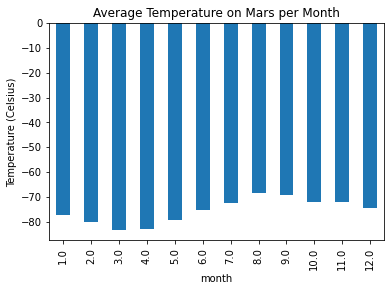

In [110]:
avg_temp.plot.bar(x='month', y='min_temp', title='Average Temperature on Mars per Month', ylabel='Temperature (Celsius)', legend = False)


The coldest month is March with -83.31 Celsius as it's average temperature. The warmest month is in August with it's average temperature at -68.38 Celsius.<br><br>

<strong>Which months have the lowest and highest atmospheric pressure on Mars? (Average the daily atmospheric pressure of all the months). Plot as a bar chart.</strong>

In [114]:
avg_pressure = month_grp[['month', 'pressure']].mean('pressure')
avg_pressure

,month,pressure
month,,
1,1.0,862.488506
2,2.0,889.455056
3,3.0,877.322917
4,4.0,806.329897
5,5.0,748.557047
6,6.0,745.054422
7,7.0,795.105634
8,8.0,873.829787
9,9.0,913.305970


<AxesSubplot:title={'center':'Average Pressure on Mars per Month'}, xlabel='month', ylabel='Pressure'>

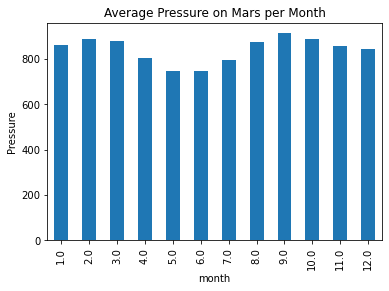

In [115]:
avg_pressure.plot.bar(x='month', y='pressure', title='Average Pressure on Mars per Month', ylabel = 'Pressure', legend=False)

September has the highest atmospheric pressure at 913.305. June has the lowest pressure at 745.054.<br><br>

<strong>About how many terrestrial Earth days exist in a Martian year? (In the time that Mars circles the Sun once, how many days elapse on Earth?) Visually estimate the result by plotting the daily minimum temperature.</strong>

<AxesSubplot:xlabel='terrestrial_date', ylabel='min_temp'>

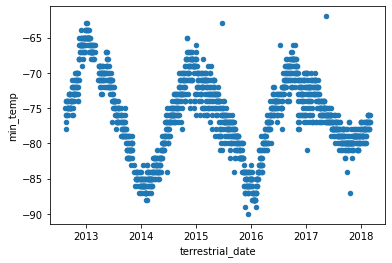

In [116]:
df.plot.scatter(x='terrestrial_date', y='min_temp')

TypeError: strptime() argument 1 must be str, not datetime.date

In [136]:
df_2012 = df.loc[df['terrestrial_date'] < datetime.strptime('2013-01-01','%Y-%m-%d')]
len(df_2012)

TypeError: can't compare datetime.datetime to datetime.date